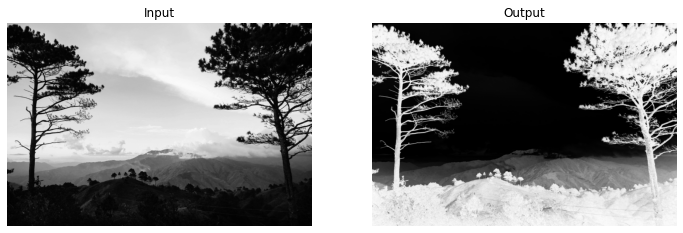

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2


def intensity_inversion(image):
    return 255 - image

def gamma_correction(image, gamma):
    invGamma = 1.0 / gamma
    table = np.array([(i / 255.0) ** invGamma * 255 for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

path = "Task1.jpg"
input_image = cv2.imread(path)

input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

inverted_image = intensity_inversion(input_image_rgb)


gamma_corrected_image = gamma_correction(inverted_image, gamma=0.4)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))


axs[0].imshow(input_image_rgb)
axs[0].set_title('Input')
axs[0].axis('off')

axs[1].imshow(gamma_corrected_image)
axs[1].set_title('Output')
axs[1].axis('off')
plt.show()


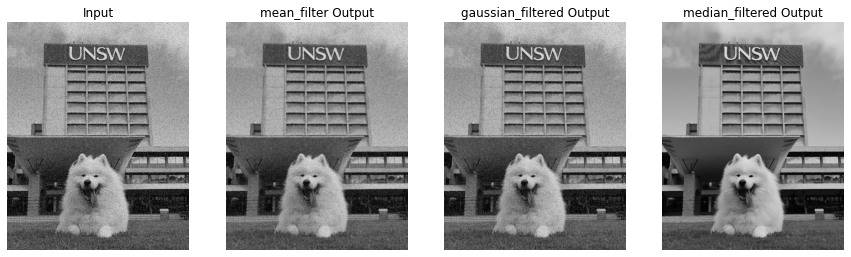

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path = "Task2.jpg"
noisy_image = cv2.imread(path)
noisy_image = cv2.cvtColor(noisy_image, cv2.COLOR_BGR2RGB)


mean_filtered = cv2.blur(noisy_image, (5, 5))  


gaussian_filtered = cv2.GaussianBlur(noisy_image, (5, 5), 0) 


median_filtered = cv2.medianBlur(noisy_image, 5)


fig, axs = plt.subplots(1, 4, figsize=(15, 5))


axs[0].imshow(noisy_image)
axs[0].set_title('Input')
axs[0].axis('off')


axs[1].imshow(mean_filtered)
axs[1].set_title('mean_filter Output')
axs[1].axis('off')


axs[2].imshow(gaussian_filtered)
axs[2].set_title('gaussian_filtered Output')
axs[2].axis('off')


axs[3].imshow(median_filtered)
axs[3].set_title('median_filtered Output')
axs[3].axis('off')

plt.show()


In [ ]:
Task3

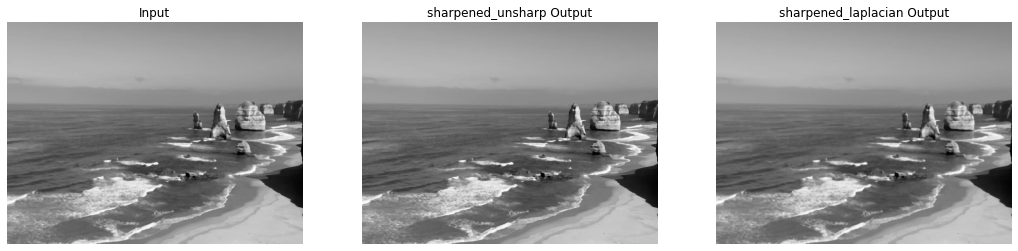

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取模糊图像
path = "Task3.jpg"  # 更新为你的图像路径
blurred_image = cv2.imread(path)
blurred_image_rgb = cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB)

# Unsharp Masking（反锐化掩模）
def unsharp_mask(image, sigma=1.0, alpha=1.5):
    blurred = cv2.GaussianBlur(image, (5, 5), sigma)
    image_float = image.astype(np.float32)
    blurred_float = blurred.astype(np.float32)
    sharpened = cv2.addWeighted(image_float, 1 + alpha, blurred_float, -alpha, 0)
    return np.clip(sharpened, 0, 255).astype(np.uint8)

sharpened_unsharp = unsharp_mask(blurred_image_rgb)


def laplacian_sharpen(image):
    
    laplacian = cv2.Laplacian(image, cv2.CV_64F)
    
    image_float = image.astype(np.float64)
    
    sharpened = cv2.add(image_float, laplacian)
    return np.clip(sharpened, 0, 255).astype(np.uint8)

sharpened_laplacian = laplacian_sharpen(blurred_image_rgb)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))


axs[0].imshow(blurred_image_rgb)
axs[0].set_title('Input')
axs[0].axis('off')

axs[1].imshow(sharpened_unsharp)
axs[1].set_title('sharpened_unsharp Output')
axs[1].axis('off')

axs[2].imshow(sharpened_laplacian)
axs[2].set_title('sharpened_laplacian Output')
axs[2].axis('off')


plt.show()
